# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Week2_Retail_Store.csv')

In [3]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


# Analisis Statistik

In [4]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


# Mendeteksi dan Menangani Missing Values

In [5]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [6]:
df.isnull().sum() * 100 / len(df)

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [7]:
df[df['Price Per Unit'].isna()]
# pada Price per unit, karena nilai kolom quantity yang berpasangan dengan nilai kolom price per unit yang NaN 
# tidak 0, maka jika NaN-nya diisi 0 akan tidak masuk akal, sehingga akan kami isi dengan median atau mean

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,NaN,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,NaN,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,NaN,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,NaN,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,NaN,1.0,26.0,Credit Card,Online,2023-01-31,True


In [8]:
price_mean = df['Price Per Unit'].mean()
price_median = df['Price Per Unit'].median()
print('Mean: ', price_mean)
print('Median: ', price_median)

Mean:  23.365911749958215
Median:  23.0


In [9]:
df[df['Quantity'].isna()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN
19,TXN_4206593,CUST_01,Furniture,NaN,35.0,NaN,NaN,Digital Wallet,Online,2025-01-13,False
25,TXN_3481599,CUST_05,Furniture,NaN,39.5,NaN,NaN,Cash,Online,2022-09-08,False
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN


In [10]:
#mengisi missing value
df['Item'].fillna('Unknown', inplace=True)
df['Price Per Unit'].fillna(price_median,inplace=True)
df['Quantity'].fillna(0,inplace=True)
df['Total Spent'].fillna(0,inplace=True)
df['Discount Applied'].fillna(False,inplace=True)

C:\Users\Hardi_Siswanto\AppData\Local\Temp\ipykernel_8120\1113053249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna('Unknown', inplace=True)
C:\Users\Hardi_Siswanto\AppData\Local\Temp\ipykernel_8120\1113053249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [11]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [12]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,False
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,False
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


# Mendeteksi dan Menangani Duplikasi

In [13]:
df.duplicated().sum()
#ga ada duplikat aman berarti
# Tidak ditemukan duplikasi data

np.int64(0)

# Analisis Distribusi Numerical dan Categorical

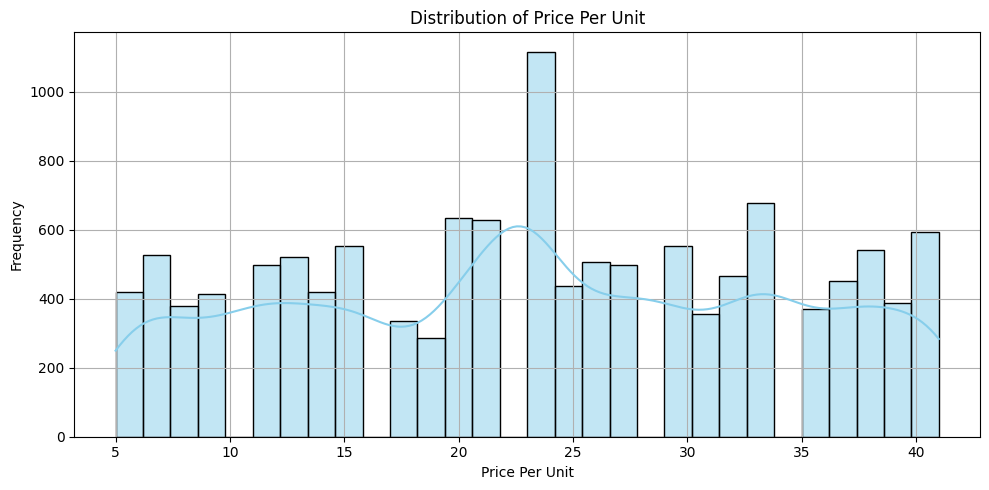

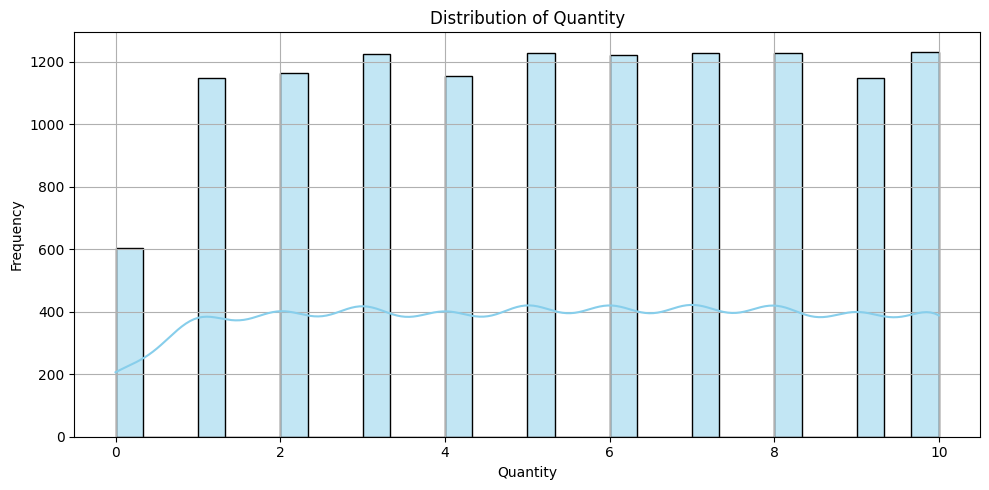

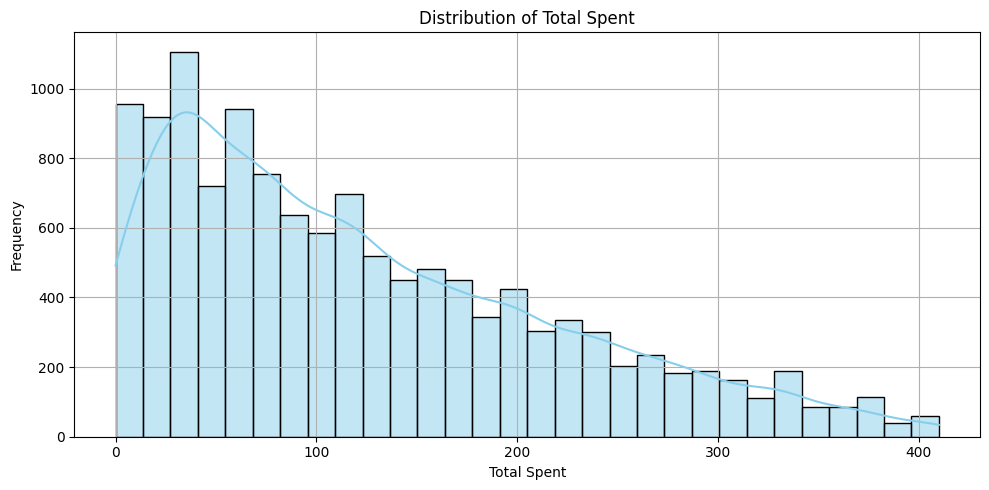

In [14]:
import seaborn as sns

for column in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column].dropna(), kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

df_min_max_scale = df.copy()
scaler = MinMaxScaler()

numerical_columns = df_min_max_scale.select_dtypes(include=['int', 'float']).columns
df_min_max_scale[numerical_columns] = scaler.fit_transform(df_min_max_scale[numerical_columns])

In [16]:
tipe_data = df_min_max_scale.dtypes
tipe_data

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied       bool
dtype: object

In [17]:
# ada transaction date tapi masih object jadi ku ubah ya
df_min_max_scale['Transaction Date'] = pd.to_datetime(df_min_max_scale['Transaction Date'])

In [18]:
df_min_max_scale['Transaction Date'].dtypes

dtype('<M8[ns]')

In [19]:
df_min_max_scale.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date
count,12575.000000,12575.000000,12575.000000,12575
mean,0.509672,0.527046,0.301037,2023-07-12 20:23:41.105368064
min,0.000000,0.000000,0.000000,2022-01-01 00:00:00
25%,0.250000,0.300000,0.106098,2022-09-30 00:00:00
50%,0.500000,0.500000,0.243902,2023-07-13 00:00:00
75%,0.750000,0.800000,0.448780,2024-04-24 00:00:00
max,1.000000,1.000000,1.000000,2025-01-18 00:00:00
std,0.291123,0.302932,0.235402,NaN


In [20]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [21]:
df.groupby('Category')['Price Per Unit'].mean()
# Di sini kami ingin melihat rata rata harga per unit di setiap kategori produk

Category
Beverages                             23.300574
Butchers                              25.013712
Computers and electric accessories    23.146341
Electric household essentials         24.317096
Food                                  23.088791
Furniture                             23.348837
Milk Products                         21.505682
Patisserie                            23.063809
Name: Price Per Unit, dtype: float64

In [22]:
df.groupby(['Payment Method', 'Category'])['Total Spent'].mean().unstack()
# Di sini kami ingin melihat total pengeluaran dari setiap kategori untuk setiap jenis pembayaran

Category,Beverages,Butchers,Computers and electric accessories,Electric household essentials,Food,Furniture,Milk Products,Patisserie
Payment Method,,,,,,,,
Cash,121.119828,139.688462,124.429616,126.179963,124.482143,128.206831,113.628083,120.767647
Credit Card,127.996868,131.704340,122.057803,124.258727,125.574111,122.224528,112.425139,118.449605
Digital Wallet,128.912402,126.560606,120.490854,133.253982,117.933908,117.913858,115.131783,118.434570


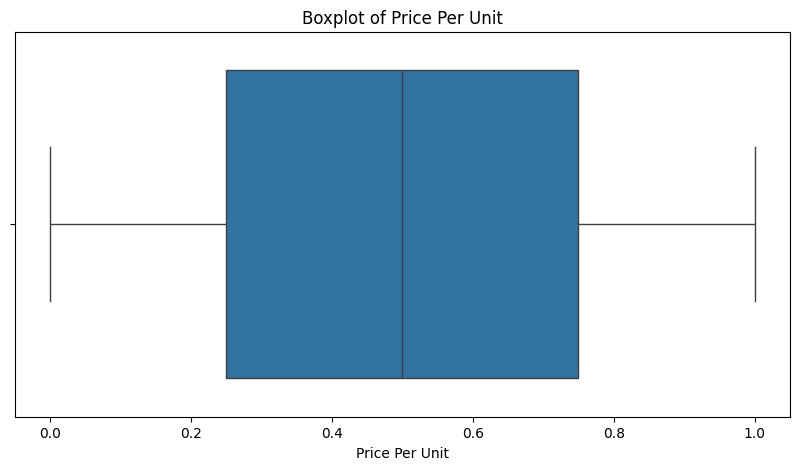

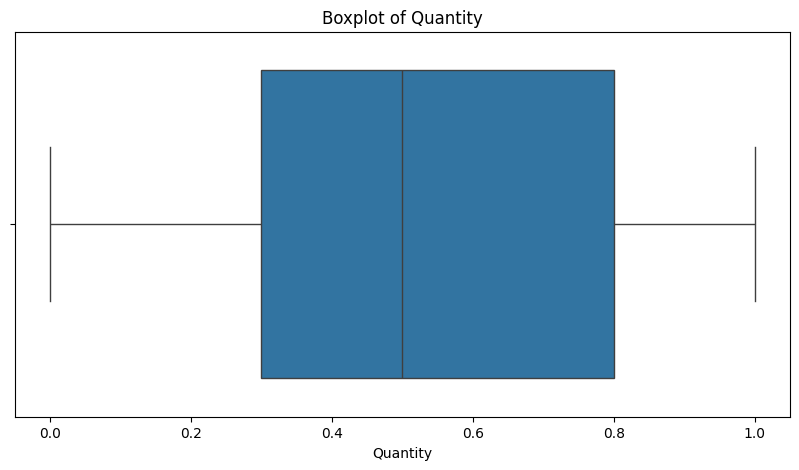

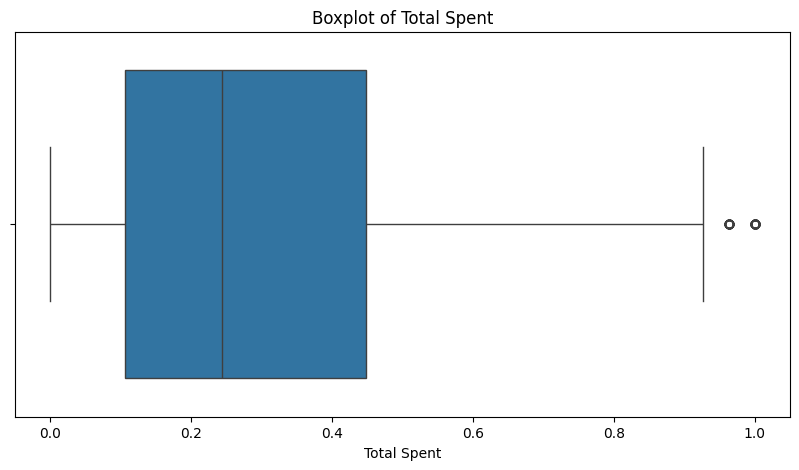

In [23]:
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_min_max_scale[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Sepertinya tidak ada outlier (nilai di atas lower/upper bound) dari data ini, 
# akan tetapi untuk main aman, kita jalankan kode di bawah ini

In [24]:
def remove_outliers_iqr(df, columns,x):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - x * IQR
        upper_bound = Q3 + x * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [25]:
df_clean = remove_outliers_iqr(df_min_max_scale, numerical_columns, 1.5)

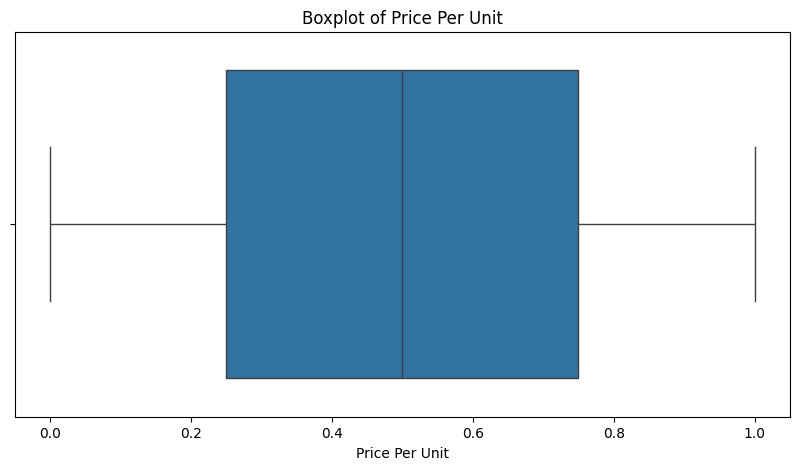

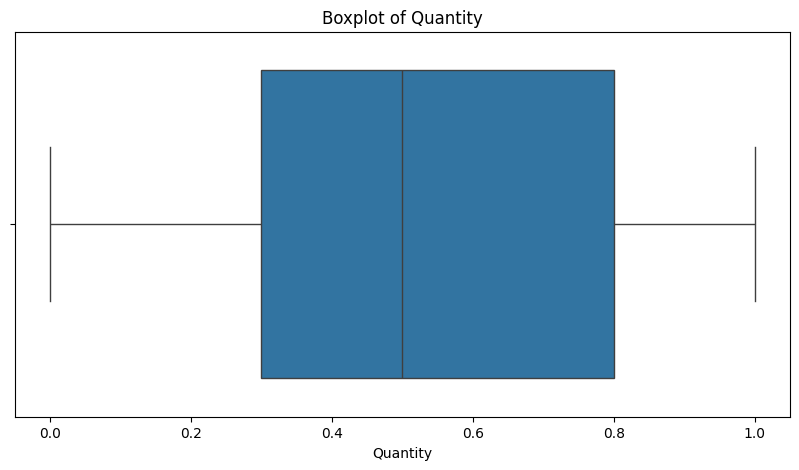

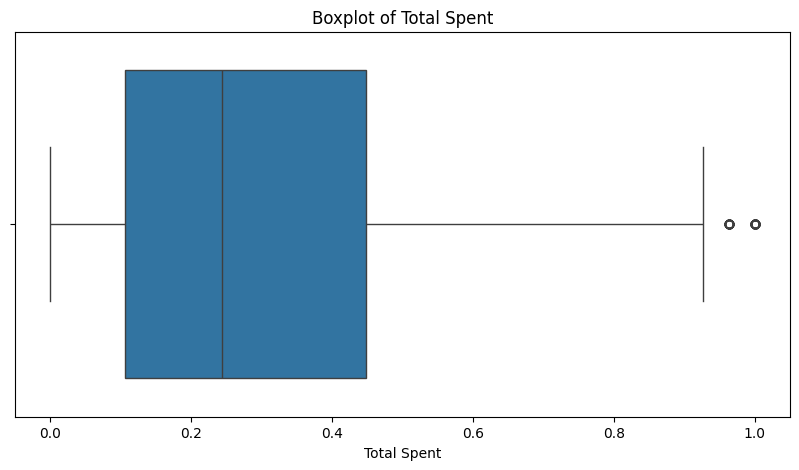

In [26]:
for column in df_clean.select_dtypes(include='number'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_min_max_scale[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

# Analisis Matrix Korelasi

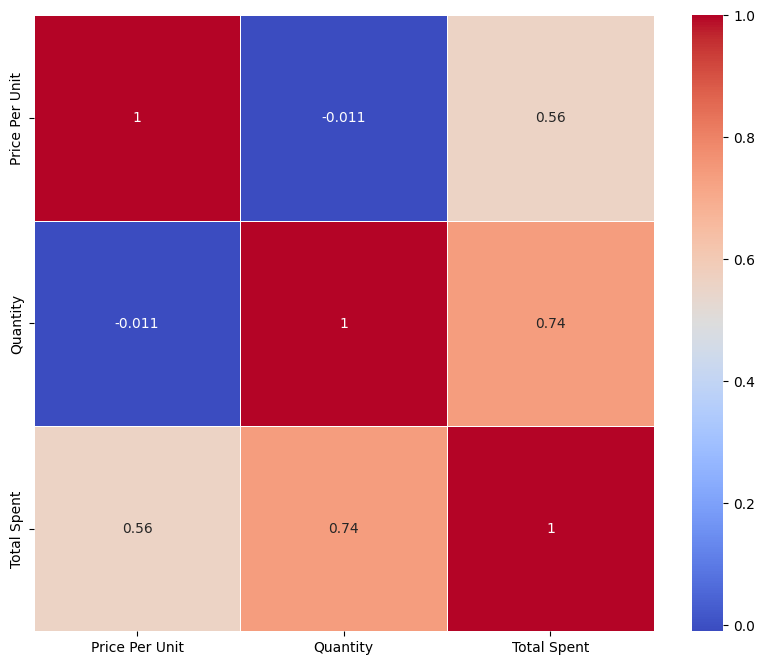

In [31]:
clean_numerical_columns = df_clean.select_dtypes(include=['int', 'float']).columns


correlation_matrix = df_clean[clean_numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
# Bisa dilihat Quantity dan Total Spent memiliki hubungan yang erat dengan koefisien korelasinya 
# di atas 0.5, begitu juga korelasi antar Price Per Unit dan Total Spent

# Visualisasi Data

In [28]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Category', y='Price Per Unit', data=df, estimator=np.mean)
# plt.title('Harga Rata-Rata per Unit per Kategori')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


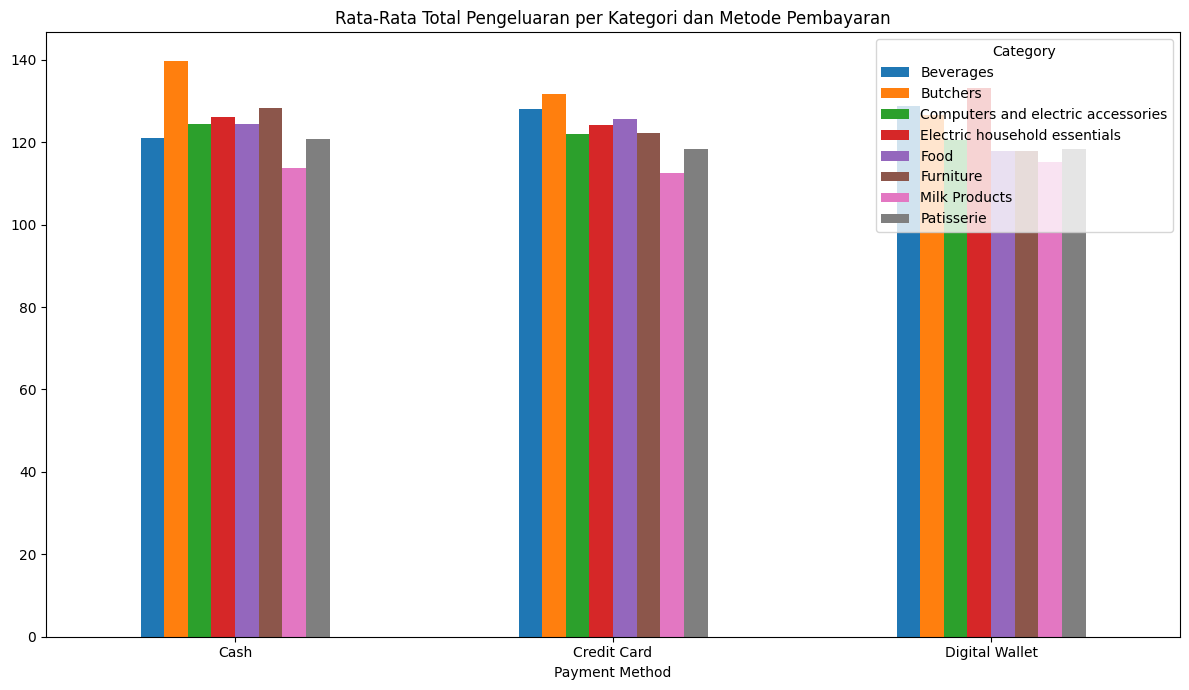

In [29]:
pivot = df.groupby(['Payment Method', 'Category'])['Total Spent'].mean().unstack()
pivot.plot(kind='bar', figsize=(12, 7))
plt.title('Rata-Rata Total Pengeluaran per Kategori dan Metode Pembayaran')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Visualisasi barplot grup menunjukkan bahwa pelanggan yang membayar dengan metode "Cash" cenderung memiliki pengeluaran lebih tinggi pada Category Butchers dan metode "Credit Card" memiliki pengeluaran tinggi kedua setelah metode Cash.<br>

Beberapa kategori seperti Electric household essentials dan Beverages menunjukkan nilai pengeluaran tertinggi saat dibayar dengan Digital Wallet.<br>

Insight dari visualisasi ini adalah bahwa toko membutuhkan strategi promosi yang lebih khusus berdasarkan metode pembayaran dan kategori produk. Misalnya, seperti diskon tambahan untuk E-Wallet agar lebih kompetitif.

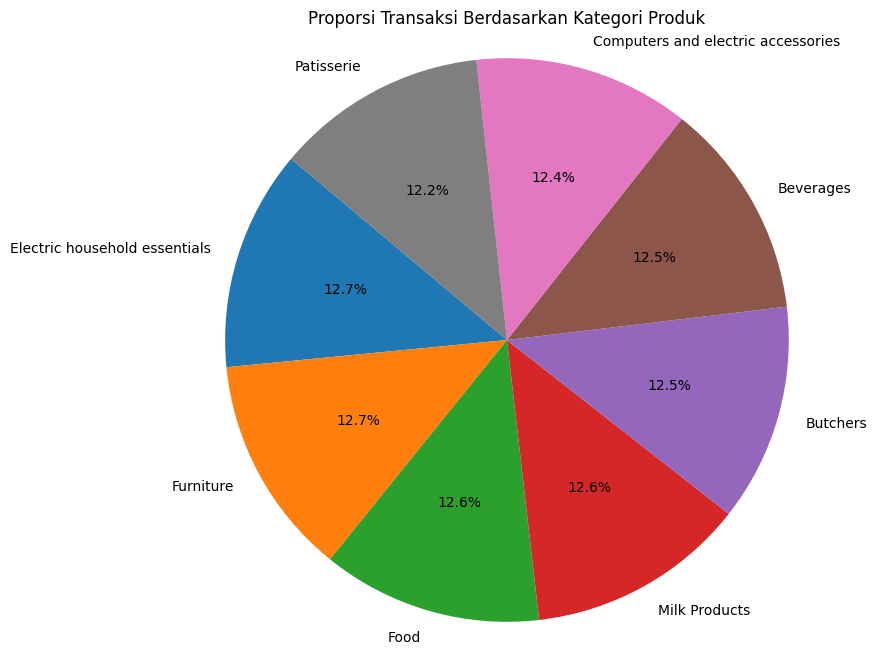

In [30]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Transaksi Berdasarkan Kategori Produk')
plt.axis('equal')  # Membuat pie berbentuk lingkaran sempurna
plt.show()


Distribusi kategori sangat merata – Seluruh kategori produk memiliki proporsi transaksi yang hampir seimbang, dengan nilai di kisaran 12–13%. Ini menunjukkan bahwa tidak ada kategori yang secara ekstrem mendominasi penjualan.<br>

Kategori "Furniture" dan "Electric household essentials" sedikit lebih unggul – Keduanya memiliki persentase tertinggi (12.7%), yang menandakan sedikit lebih sering dibeli dibandingkan kategori lain.<br>

Kategori "Patisserie" berada di posisi terendah (12.2%), walaupun selisihnya kecil. Ini bisa menunjukkan bahwa produk jenis ini lebih niche atau hanya dibeli oleh segmen pelanggan tertentu.<br>

# kesimpulan



Pie chart ini membantu menyimpulkan bahwa toko memiliki portofolio produk yang seimbang secara transaksi, namun masih ada potensi untuk diferensiasi promosi berdasarkan kategori. Langkah selanjutnya adalah mengaitkan proporsi ini dengan nilai total pengeluaran (revenue) untuk melihat apakah frekuensi tinggi juga berarti profit tinggi.